In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.misc import derivative
from matplotlib.colors import LogNorm, Normalize, SymLogNorm
from matplotlib.ticker import LogFormatter, LogLocator
from matplotlib.cm import ScalarMappable

%matplotlib widget

In [3]:
def potential(theta1, theta2, J12, Jmax, omega1, omega2, theta0):
    return -J12*np.cos(theta1-theta2) - Jmax*omega1*np.cos(theta1-omega1)*np.heaviside(theta0-np.abs(theta1-omega1), 0) + Jmax*omega2*np.cos(theta2)*np.heaviside(theta0-np.abs(theta2-omega2), 0)

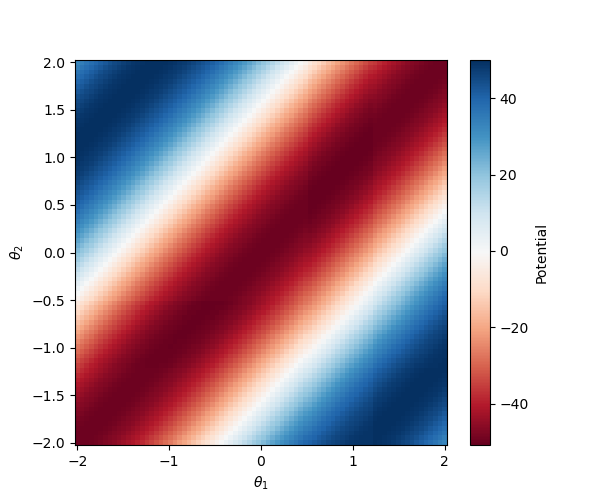

In [4]:
plt.close()

fig = plt.figure(figsize=(6,5))

# create a meshgrid of theta1 and theta2
theta0 = np.radians(20)
theta1_1d = np.linspace(-2, 2, 80)
theta2_1d = np.linspace(-2, 2, 80)
theta1, theta2 = np.meshgrid(theta1_1d, theta2_1d)

# define the parameters
J12 = 50
Jmax = 1

omega1 = np.radians(50)
omega2 = np.radians(-50)

# calculate the potential
U = potential(theta1, theta2, J12, Jmax, omega1, omega2, theta0)

# plot the potential
plt.pcolormesh(theta1, theta2, U, cmap='RdBu')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.colorbar(label='Potential')
plt.show()

# save the figure
# fig.savefig('../img/potential_shape_deltaom30.pdf', dpi=300, bbox_inches='tight')

-0.07594936708860756 -0.025316455696202667
-0.2278481012658229 -0.2278481012658229
0.278481012658228 0.278481012658228


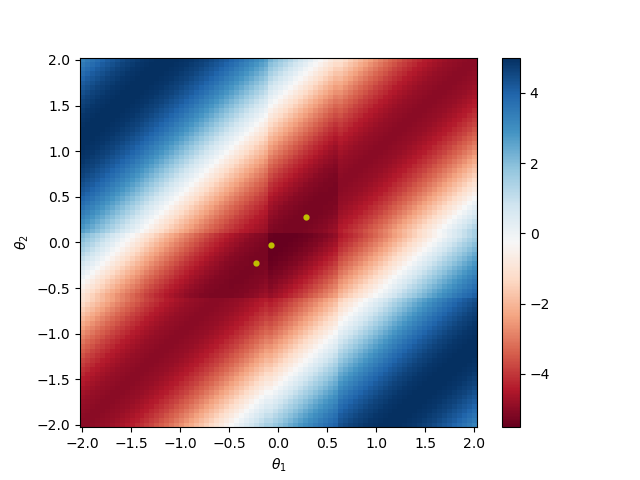

In [90]:
plt.close()
def value_to_index(value, linspace_array):
    return int(round((value - linspace_array[0]) / (linspace_array[1] - linspace_array[0])))

a1 = 0
c1 = -0.5
b1 = 0.5
d1 = 0.0

a2 = -0.4
b2 = -0.2
c2 = -0.4
d2 = -0.2

a3 = 0.2
b3 = 0.4
c3 = 0.2
d3 = 0.4

a1_index = value_to_index(a1, theta1_1d)
b1_index = value_to_index(b1, theta1_1d)
c1_index = value_to_index(c1, theta2_1d)
d1_index = value_to_index(d1, theta2_1d)
a2_index = value_to_index(a2, theta1_1d)
b2_index = value_to_index(b2, theta1_1d)
c2_index = value_to_index(c2, theta2_1d)
d2_index = value_to_index(d2, theta2_1d)
a3_index = value_to_index(a3, theta1_1d)
b3_index = value_to_index(b3, theta1_1d)
c3_index = value_to_index(c3, theta2_1d)
d3_index = value_to_index(d3, theta2_1d)

# define the regions where to look for the minima
regions = [
    (slice(a1_index, b1_index), slice(c1_index, d1_index)), 
    (slice(a2_index, b2_index), slice(c2_index, d2_index)),
    (slice(a3_index, b3_index), slice(c3_index, d3_index))
]

plt.pcolormesh(theta1, theta2, U, cmap='RdBu', snap=True)

# for each region, find and plot the minimum
for region in regions:
    min_indices = np.unravel_index(np.argmin(U[region], axis=None), U[region].shape)
    theta1_min = theta1[region][min_indices]
    theta2_min = theta2[region][min_indices]
    plt.plot(theta1_min, theta2_min, '.', color='y', markersize=5, markeredgewidth=2, label='minimum')
    print(theta1_min, theta2_min)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.colorbar()
plt.show()

plt.savefig('../img/potential_shape_min.pdf', dpi=300)